# LIBRARIES AND DEPENDENCIES

In [1]:
!pip install --user --upgrade google-api-python-client

In [16]:
!pip install --user pandas-gbq -U

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas_gbq
from google.cloud import bigquery
from functions import *

%reload_ext google.cloud.bigquery
# Set your default project here
pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

In [19]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=OUzK7XSBW7I5rwrM6JCqlXjRJsRypg&access_type=offline&code_challenge=yEADNh7PjVAfvgLWX36jjsDmYIhFdbkqI1flZ_e68rY&code_challenge_method=S256


Credentials saved to file: [C:\Users\cmigu\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project

# CUSTOMER

In [21]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_customer 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

CUSTOMER_ACCOUNT_NR_MASK GENDER  FAMILY_MEMBERS   CP4  seg_lifestyle_cd  \
0                    12655714      F               4  4430                 1   
1                      561449      M               1  8365                 2   
2                     9934137      M               5  1500                 3   
3                     8887927      M               2  4430                 2   
4                     1863271      F               4  2745                 1   
..                        ...    ...             ...   ...               ...   
995                  11663702      M               3  8375                 2   
996                   2368756      F               2  8200                 2   
997                   1352311      F               2  0000                 2   
998                  10977457      F               1  8000                 1   
999                   8065426   None               2  8200                 2   

    seg_lifestyle_dsc SEG_AGE SEG_AGE_DSC  seg_lifestage_cd seg_lifestage_dsc  
0           Qualidade    SA_7         >65                 2            Senior  
1             Família    SA_7         >65                 2            Senior  
2               Preço    SA_7         >65                 2            Senior  
3             Família    SA_7         >65                 2            Senior  
4           Qualidade    SA_7         >65                 2            Senior  
..                ...     ...         ...               ...               ...  
995           Família    SA_7         >65                 2            Senior  
996           Família    SA_7         >65                 2            Senior  
997           Família    SA_7         >65                 2            Senior  
998         Qualidade    SA_7         >65                 2            Senior  
999           Família    SA_7         >65                 2            Senior  

[1000 rows x 10 columns]

# LOCATION

In [5]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_location 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


LOCATION_CD          LOCATION_DSC  LOC_BRAND_CD       LOC_BRAND_DSC   cp7
0            282   CBD VIZ S. JOÃO VER           302  continente bom dia  4520
1            303  CBD VIZ CAMPO GRANDE           302  continente bom dia  1700
2            304      CBD VALE FORMOSO           302  continente bom dia  4250
3            307     CBD NORTESHOPPING           302  continente bom dia  4464
4            309        CBD VIZ OEIRAS           302  continente bom dia  2780
..           ...                   ...           ...                 ...   ...
368         7905       TENDA CNT EVORA           143          continente  7000
369         7906       TENDA CNT VIANA           143          continente  4900
370         7907   TENDA CNT GAIASHOPP           143          continente  4404
371         7908    TENDA CNT BRAGA MC           143          continente  4710
372         7927       TENDA MCH MAFRA           143          continente  2640

[373 rows x 5 columns]

# PRODUCT

In [6]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_product 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


SKU                               PRODUCT_DSC  UNIT_BASE_CD_EXT  \
0    4036442   SAL PURIFICADO CRISTAL IODADO VATEL 1KG           1020703   
1    5723928         SAL MARINHO IODADO CONTINENTE 1KG           1020703   
2    6522766        SAL ROSA HIMAL ORIGENS GROSSO 500G           1020750   
3    6522770      SAL ROSA HIMALAIAS ORIGENS FINO 500G           1020750   
4    7389930  SAL DOS HIMALAIAS GROSSO ORIGENS BIO 1KG           1020750   
..       ...                                       ...               ...   
995  7227790                    SET JOGGING L GREY MGE          41040603   
996  7354498                    SET JOGGING FL SCARLET          41040603   
997  7354499                    SET JOGGING FL SCARLET          41040603   
998  7354500                    SET JOGGING FL SCARLET          41040603   
999  7354501                    SET JOGGING FL SCARLET          41040603   

           UNIT_BASE_DSC_EXT  SUBCAT_CD_EXT SUBCAT_DSC_EXT  CAT_CD_EXT  \
0          01020703 - Iodado          10207   010207 - sal         102   
1          01020703 - Iodado          10207   010207 - sal         102   
2         01020750 - Sal bio          10207   010207 - sal         102   
3         01020750 - Sal bio          10207   010207 - sal         102   
4         01020750 - Sal bio          10207   010207 - sal         102   
..                       ...            ...            ...         ...   
995  41040603 - jogging sets         410406  410406 - sets        4104   
996  41040603 - jogging sets         410406  410406 - sets        4104   
997  41040603 - jogging sets         410406  410406 - sets        4104   
998  41040603 - jogging sets         410406  410406 - sets        4104   
999  41040603 - jogging sets         410406  410406 - sets        4104   

                    CAT_DSC_EXT  BIZ_UNIT_CD_EXT        BIZ_UNIT_DSC_EXT  \
0               0102 - temperos                1  01 - Mercearia Salgada   
1               0102 - temperos                1  01 - Mercearia Salgada   
2               0102 - temperos                1  01 - Mercearia Salgada   
3               0102 - temperos                1  01 - Mercearia Salgada   
4               0102 - temperos                1  01 - Mercearia Salgada   
..                          ...              ...                     ...   
995  4104 - toddler boy apparel               41       41 - Baby Apparel   
996  4104 - toddler boy apparel               41       41 - Baby Apparel   
997  4104 - toddler boy apparel               41       41 - Baby Apparel   
998  4104 - toddler boy apparel               41       41 - Baby Apparel   
999  4104 - toddler boy apparel               41       41 - Baby Apparel   

     DEPARTMENT_CD_EXT DEPARTMENT_DSC_EXT PRODUCT_SHORT_DSC    BRAND_DSC  \
0                   10     10 - ALIMENTAR   SAL IOD VATE1KG        VATEL   
1                   10     10 - ALIMENTAR        SAL IODADO   CONTINENTE   
2                   10     10 - ALIMENTAR   SAL ROSA HIM GR      ORIGENS   
3                   10     10 - ALIMENTAR   SAL ROSA HIM FI      ORIGENS   
4                   10     10 - ALIMENTAR   SAL DOS HIMALAI  ORIGENS BIO   
..                 ...                ...               ...          ...   
995                 24       24 - TEXTILE          CONJUNTO      MO KIDS   
996                 24       24 - TEXTILE       FATO TREINO      MO KIDS   
997                 24       24 - TEXTILE       FATO TREINO      MO KIDS   
998                 24       24 - TEXTILE       FATO TREINO      MO KIDS   
999                 24       24 - TEXTILE       FATO TREINO      MO KIDS   

    BRAND_TYPE_CD PRICE_RANGE  CONVERSION_FACTOR CAPACITY_UNIT  
0              MF  SECUNDARIA               1.00            KG  
1              MP     PROPRIA               1.00            KG  
2              MF  SECUNDARIA               0.50            KG  
3              MF  SECUNDARIA               0.50            KG  
4              MF  SECUNDARIA               1.00        

# TRANSACTION

In [4]:
query = '''
    SELECT * 
    FROM 
        tables_raw.fact_transaction 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


TIME_KEY  TRANSACTION_ID_MASK  CUSTOMER_ACCOUNT_NR_MASK  LOC_BRAND_CD  \
0    20221001  8722826461128679007               54554207.00           302   
1    20221003  8724769368346523989                7953131.00           302   
2    20210828  7459153832834659241               10832968.00           302   
3    20211015  7220034463983159238                1354995.00           302   
4    20220504  8897033298765346536                2951170.00           302   
..        ...                  ...                       ...           ...   
995  20210402  7060212678385749784               19574150.00           302   
996  20210509  7384098861475575966                5062979.00           302   
997  20210717  7454431106971897498               51344684.00           302   
998  20210908  7468135224913251404                9523867.00           302   
999  20220227  8796120810190863187               92818860.00           302   

     LOCATION_CD POS_TP_CD      SKU    PRODUCT_KEY   QTY  NET_SLS_AMT  \
0           1704         P  3835895  3835895010001  1.00         0.00   
1           1911         P  5739886  5739886010001  2.00         0.00   
2           7932         P  7141520  7141520010001  1.00         0.00   
3           3464         P  7418398  7418398010001  1.00         0.00   
4           1984         P  3652458  3652458010001  1.06         2.00   
..           ...       ...      ...            ...   ...          ...   
995         7679         P  7080851  7080851010001 -1.00        -0.50   
996         1706         P  7080850  7080850010001 -1.00        -0.50   
997         1704         P  7080850  7080850010001 -1.00        -0.50   
998         5769         P  6878014  6878014010001 -1.00        -0.75   
999         9083         P  5893526  5893526010001 -1.00        -0.75   

     GROSS_SLS_AMT  PROD_DSCNT_ISSUED_AMT  TRANS_DSCNT_RAT_AMT  \
0             0.00                   0.00                 0.00   
1             0.00                   0.00                 0.00   
2             0.00                   0.00                 0.00   
3             0.00                   0.00                 0.00   
4             2.12                   0.00                 0.38   
..             ...                    ...                  ...   
995          -0.50                   0.00                 0.00   
996          -0.50                   0.00                 0.00   
997          -0.50                   0.00                -0.01   
998          -0.75                   0.00                 0.00   
999          -0.75                   0.00                 0.00   

     DIRECT_DSCNT_AMT  
0                0.75  
1                1.50  
2                6.40  
3                1.79  
4                0.00  
..                ...  
995              0.00  
996              0.00  
997              0.00  
998              0.00  
999              0.04  

[1000 rows x 14 columns]

# Customer Segment's Analysis

In [3]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

lifestyle = query.result().to_dataframe() # Wait for the job to complete.
lifestyle

seg_lifestyle_dsc  total_gross_sales  total_net_sales  \
0         Qualidade        83096902.72      72210964.73   
1           Família        73740487.76      64103342.54   
2             Preço        26921593.24      23329228.51   
3         Sem Valor          797908.74        691911.85   

   net_gross_ratio_rounded  
0                     0.87  
1                     0.87  
2                     0.87  
3                     0.87

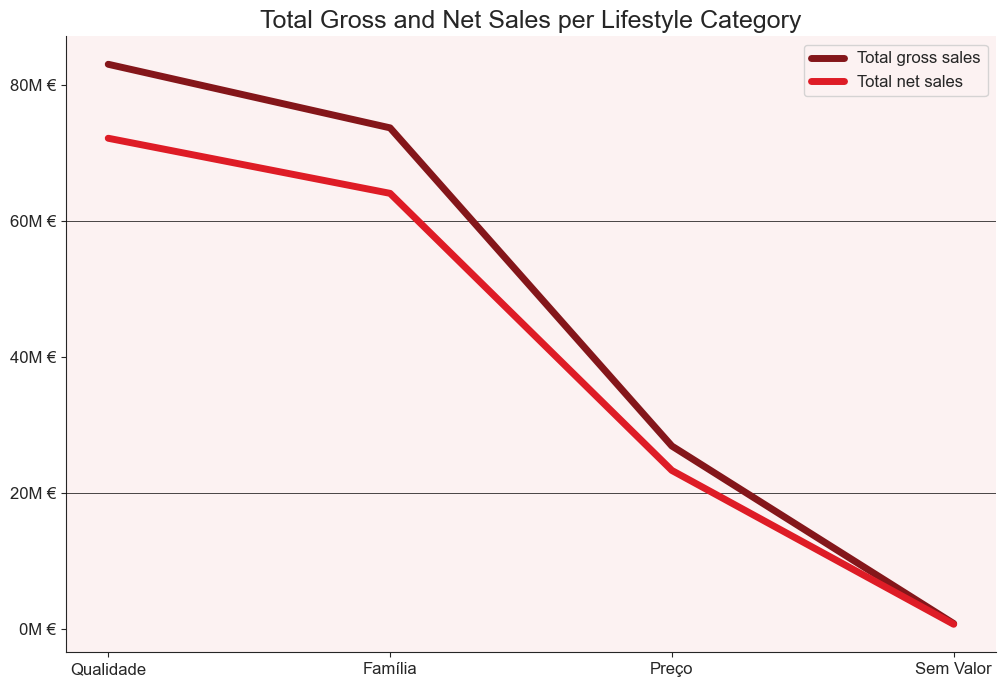

In [4]:
line_plot(lifestyle, 'Total Gross and Net Sales per Lifestyle Category')

In [5]:
query = client.query("""
    SELECT 
        seg_lifestage_dsc, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestage_dsc
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

lifestage = query.result().to_dataframe() # Wait for the job to complete.
lifestage

seg_lifestage_dsc  total_gross_sales  total_net_sales  \
0                Senior        45765668.55      40139697.36   
1     Family Supporters         6213850.18       5430533.88   
2         Active Adults        55850888.07      48401462.72   
3      Family with Kids        47439386.42      41006872.84   
4  Family w/ Young Adul        26091586.96      22589199.34   
5              No Value         3195512.27       2767681.48   

   net_gross_ratio_rounded  
0                     0.88  
1                     0.88  
2                     0.87  
3                     0.87  
4                     0.87  
5                     0.87

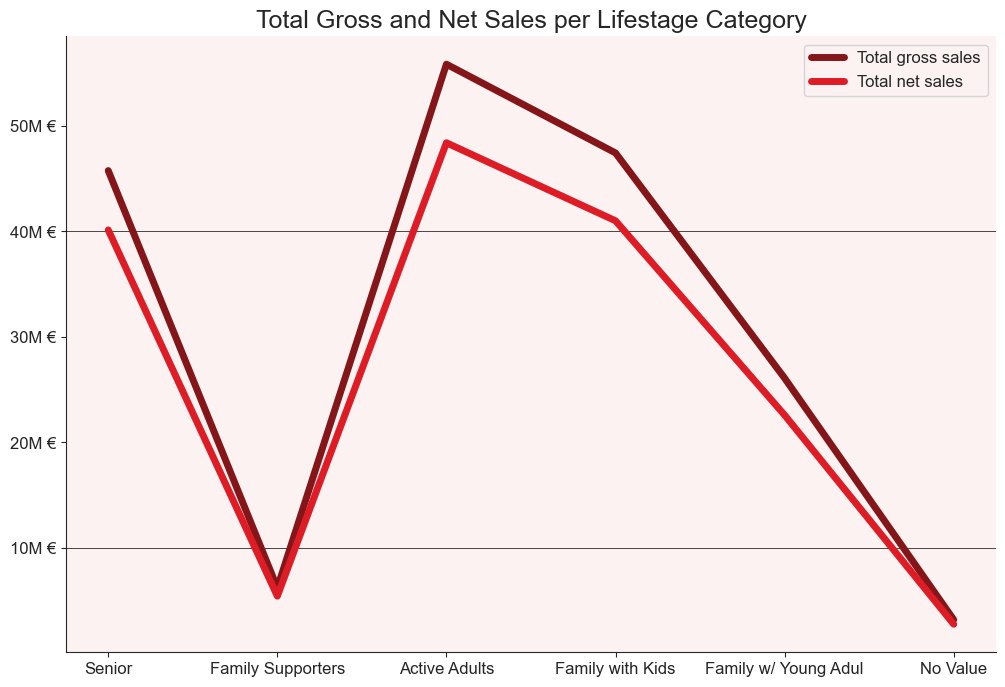

In [6]:
line_plot(lifestage, 'Total Gross and Net Sales per Lifestage Category')

In [7]:
query = client.query("""
    SELECT 
        SEG_AGE_DSC, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        SEG_AGE_DSC
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

seg_age = query.result().to_dataframe() # Wait for the job to complete.
seg_age

SEG_AGE_DSC  total_gross_sales  total_net_sales  net_gross_ratio_rounded
0         >65        34837975.04      30576683.51                     0.88
1     ]55;65]        32960505.48      28741932.88                     0.88
2     ]45;55]        43660403.41      37865092.97                     0.87
3     ]35;45]        39698843.18      34331705.53                     0.87
4     ]25;35]        22087666.50      19047107.16                     0.87
5   Sem Valor         5555563.67       4827907.49                     0.87
6      [0;18]          270153.32        234806.06                     0.87
7     ]18;25]         5485781.85       4710212.03                     0.86

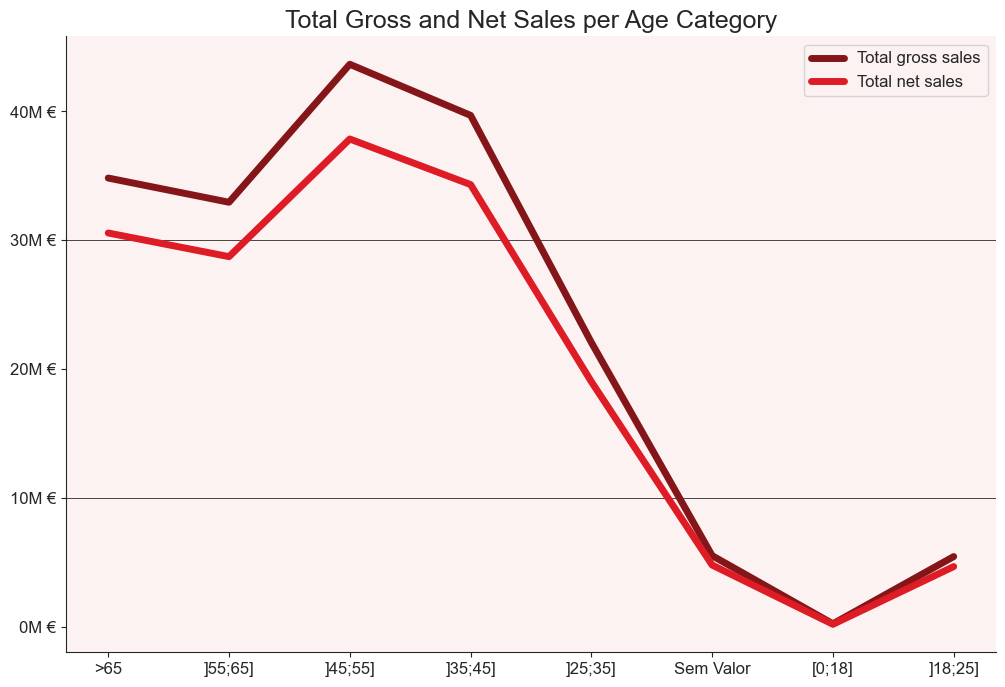

In [8]:
line_plot(seg_age, 'Total Gross and Net Sales per Age Category')

In [9]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc     seg_lifestage_dsc SEG_AGE_DSC  total_gross_sales  \
0              Preço     Family Supporters     ]25;35]           25476.85   
1              Preço                Senior      [0;18]           19283.22   
2            Família                Senior      [0;18]            8232.39   
3            Família     Family Supporters      [0;18]             971.73   
4            Família                Senior         >65        14439569.12   
5            Família                Senior   Sem Valor          362752.55   
6            Família              No Value         >65          153604.28   
7              Preço         Active Adults      [0;18]           47236.41   
8              Preço     Family Supporters   Sem Valor            2990.38   
9          Sem Valor                Senior     ]18;25]            2853.77   
10           Família     Family Supporters     ]18;25]            1944.79   
11         Sem Valor                Senior      [0;18]             692.56   
12         Qualidade                Senior         >65        12250057.64   
13         Qualidade         Active Adults     ]55;65]         6016164.86   
14           Família         Active Adults     ]55;65]         4911407.60   
15         Qualidade                Senior     ]55;65]         4324765.02   
16           Família                Senior     ]55;65]         4028489.96   
17             Preço                Senior         >65         2928002.24   
18           Família  Family w/ Young Adul     ]55;65]         2179338.64   
19         Qualidade     Family Supporters         >65         2008627.01   

    total_net_sales  net_gross_ratio_rounded  
0          22676.49                     0.90  
1          17211.62                     0.90  
2           7334.51                     0.90  
3            866.33                     0.90  
4       12710226.22                     0.89  
5         320124.71                     0.89  
6         135306.31                     0.89  
7          41818.98                     0.89  
8           2636.52                     0.89  
9           2513.48                     0.89  
10          1725.23                     0.89  
11           612.09                     0.89  
12      10734945.00                     0.88  
13       5241504.16                     0.88  
14       4284743.53                     0.88  
15       3780291.25                     0.88  
16       3535055.96                     0.88  
17       2566203.68                     0.88  
18       1897668.91                     0.88  
19       1753920.06                     0.88

In [10]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.90
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc  seg_lifestage_dsc SEG_AGE_DSC  total_gross_sales  \
0             Preço  Family Supporters     ]25;35]           25476.85   
1             Preço             Senior      [0;18]           19283.22   
2           Família             Senior      [0;18]            8232.39   
3           Família  Family Supporters      [0;18]             971.73   

   total_net_sales  net_gross_ratio_rounded  
0         22676.49                     0.90  
1         17211.62                     0.90  
2          7334.51                     0.90  
3           866.33                     0.90

In [11]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.89
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc  seg_lifestage_dsc SEG_AGE_DSC  total_gross_sales  \
0           Família             Senior         >65        14439569.12   
1           Família             Senior   Sem Valor          362752.55   
2           Família           No Value         >65          153604.28   
3             Preço      Active Adults      [0;18]           47236.41   
4             Preço  Family Supporters   Sem Valor            2990.38   
5         Sem Valor             Senior     ]18;25]            2853.77   
6           Família  Family Supporters     ]18;25]            1944.79   
7         Sem Valor             Senior      [0;18]             692.56   

   total_net_sales  net_gross_ratio_rounded  
0      12710226.22                     0.89  
1        320124.71                     0.89  
2        135306.31                     0.89  
3         41818.98                     0.89  
4          2636.52                     0.89  
5          2513.48                     0.89  
6          1725.23                     0.89  
7           612.09                     0.89

In [12]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.88
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc     seg_lifestage_dsc SEG_AGE_DSC  total_gross_sales  \
0          Qualidade                Senior         >65        12250057.64   
1          Qualidade         Active Adults     ]55;65]         6016164.86   
2            Família         Active Adults     ]55;65]         4911407.60   
3          Qualidade                Senior     ]55;65]         4324765.02   
4            Família                Senior     ]55;65]         4028489.96   
5              Preço                Senior         >65         2928002.24   
6            Família  Family w/ Young Adul     ]55;65]         2179338.64   
7          Qualidade     Family Supporters         >65         2008627.01   
8          Qualidade                Senior     ]45;55]         1980895.23   
9            Família     Family Supporters         >65         1898373.15   
10             Preço         Active Adults     ]55;65]         1544548.88   
11           Família                Senior     ]45;55]         1240542.22   
12             Preço                Senior     ]55;65]          968652.36   
13         Qualidade         Active Adults   Sem Valor          695065.95   
14         Qualidade     Family Supporters     ]55;65]          687462.83   
15             Preço  Family w/ Young Adul     ]55;65]          577475.26   
16         Qualidade                Senior     ]35;45]          570479.86   
17           Família         Active Adults   Sem Valor          570503.66   
18           Família                Senior     ]35;45]          486127.01   
19           Família     Family Supporters     ]55;65]          449133.37   

    total_net_sales  net_gross_ratio_rounded  
0       10734945.00                     0.88  
1        5241504.16                     0.88  
2        4284743.53                     0.88  
3        3780291.25                     0.88  
4        3535055.96                     0.88  
5        2566203.68                     0.88  
6        1897668.91                     0.88  
7        1753920.06                     0.88  
8        1732646.80                     0.88  
9        1662515.56                     0.88  
10       1345496.82                     0.88  
11       1084580.68                     0.88  
12        844342.12                     0.88  
13        606647.22                     0.88  
14        599885.80                     0.88  
15        502498.24                     0.88  
16        498052.95                     0.88  
17        496434.70                     0.88  
18        426721.08                     0.88  
19        391649.81                     0.88

In [13]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.87
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc     seg_lifestage_dsc SEG_AGE_DSC  total_gross_sales  \
0          Qualidade         Active Adults     ]45;55]         9904713.10   
1            Família      Family with Kids     ]35;45]         9615464.04   
2          Qualidade      Family with Kids     ]35;45]         9477382.97   
3            Família         Active Adults     ]45;55]         6969874.14   
4          Qualidade         Active Adults     ]35;45]         5168241.32   
5          Qualidade  Family w/ Young Adul     ]45;55]         5114264.37   
6          Qualidade         Active Adults     ]25;35]         4511666.32   
7            Família      Family with Kids     ]25;35]         4426771.72   
8            Família      Family with Kids     ]45;55]         4053331.24   
9          Qualidade      Family with Kids     ]45;55]         4029757.63   
10           Família  Family w/ Young Adul     ]45;55]         3617807.57   
11         Qualidade      Family with Kids     ]25;35]         3526563.80   
12           Família         Active Adults     ]35;45]         3456651.10   
13             Preço         Active Adults     ]45;55]         2723290.15   
14         Qualidade  Family w/ Young Adul     ]55;65]         2579609.97   
15             Preço      Family with Kids     ]35;45]         2435337.61   
16         Qualidade  Family w/ Young Adul     ]35;45]         2245490.13   
17             Preço         Active Adults     ]35;45]         2093876.18   
18           Família         Active Adults     ]25;35]         2014107.26   
19         Qualidade      Family with Kids     ]55;65]         1910700.96   

    total_net_sales  net_gross_ratio_rounded  
0        8596254.50                     0.87  
1        8287440.54                     0.87  
2        8220413.53                     0.87  
3        6048947.13                     0.87  
4        4474283.88                     0.87  
5        4436222.31                     0.87  
6        3881890.66                     0.87  
7        3808195.93                     0.87  
8        3503513.82                     0.87  
9        3491153.54                     0.87  
10       3129826.83                     0.87  
11       3053936.37                     0.87  
12       2986997.94                     0.87  
13       2357548.17                     0.87  
14       2243354.14                     0.87  
15       2103619.54                     0.87  
16       1937187.67                     0.87  
17       1807820.45                     0.87  
18       1733564.20                     0.87  
19       1659557.89                     0.87

In [16]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       100.0 * COUNT(*) / SUM(COUNT(*)) OVER() AS market_share
   FROM 
       tables_raw.dim_customer
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       market_share DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

SEG_AGE_DSC  market_share
0         >65         20.47
1     ]45;55]         19.68
2     ]35;45]         18.74
3     ]55;65]         16.01
4     ]25;35]         13.79
5   Sem Valor          5.55
6     ]18;25]          5.41
7      [0;18]          0.36

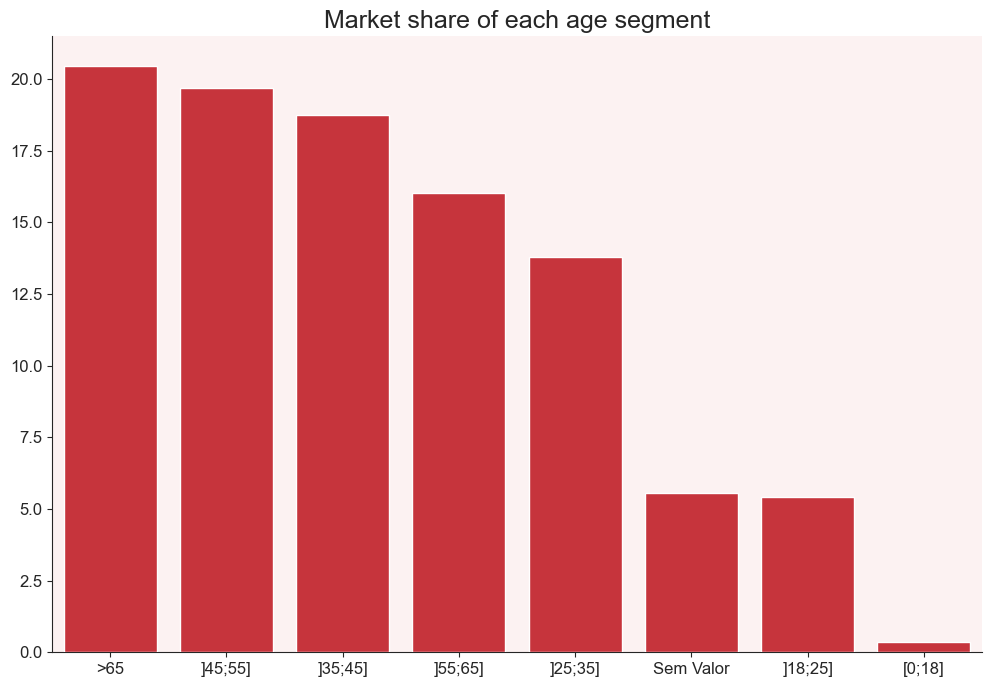

In [17]:
bar_plot(df, 'Market share of each age segment')

In [18]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       AVG(NET_SLS_AMT) AS avg_net_sales 
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       avg_net_sales DESC
   LIMIT 20
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

SEG_AGE_DSC  avg_net_sales
0      [0;18]           2.82
1         >65           2.69
2     ]55;65]           2.53
3   Sem Valor           2.41
4     ]45;55]           2.40
5     ]35;45]           2.31
6     ]25;35]           2.17
7     ]18;25]           2.03

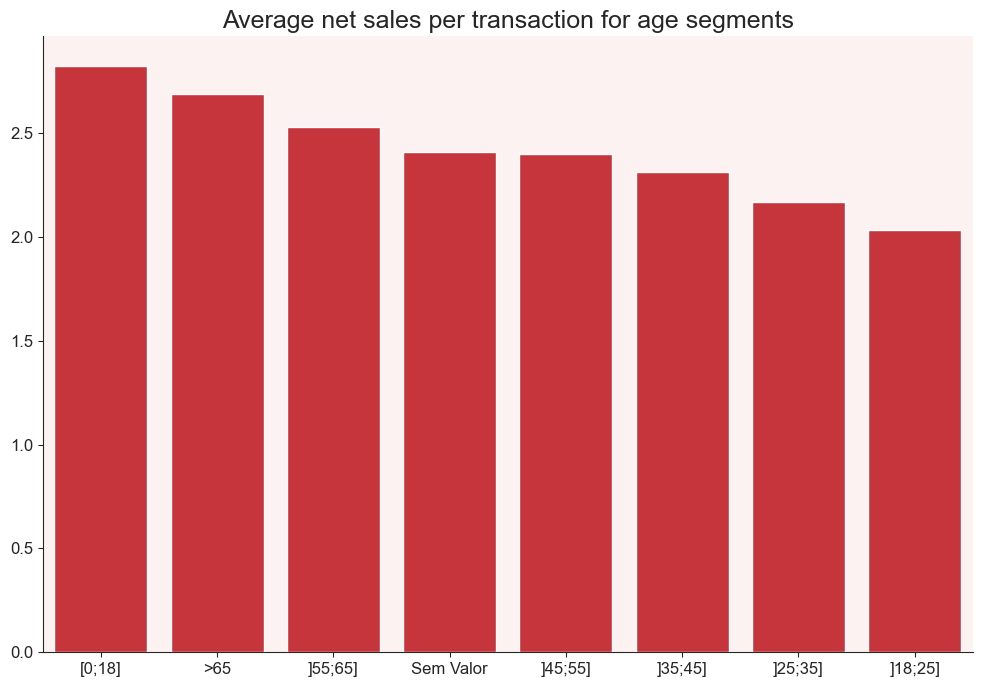

In [19]:
bar_plot(df, 'Average net sales per transaction for age segments')

In [14]:
query = client.query("""
    SELECT 
        seg_lifestage_dsc, COUNT(*) AS num_transactions
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
        JOIN tables_raw.dim_location USING(LOCATION_CD)
        JOIN tables_raw.dim_product USING(SKU)
    GROUP BY 
        seg_lifestage_dsc
    ORDER BY
        num_transactions DESC
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestage_dsc  num_transactions
0         Active Adults          21732069
1      Family with Kids          17785078
2                Senior          14780013
3  Family w/ Young Adul           9132512
4     Family Supporters           2056353
5              No Value           1082583

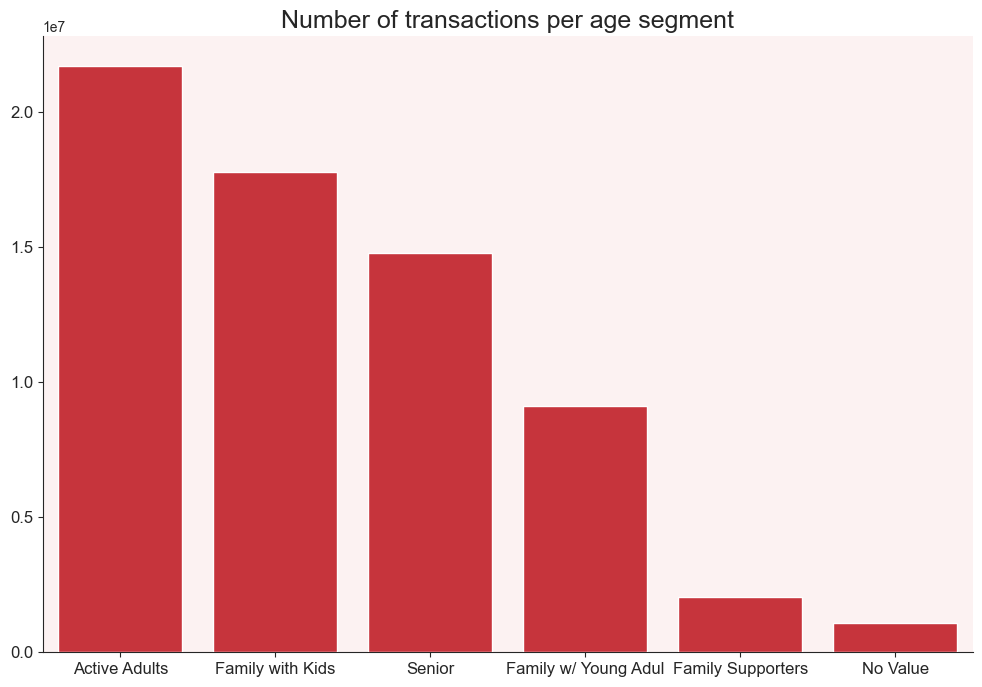

In [15]:
bar_plot(df, 'Number of transactions per age segment')

# Customer-Category Analysis

In [20]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

SEG_AGE_DSC  num_categories_bought
0     ]35;45]                    173
1     ]55;65]                    173
2     ]25;35]                    171
3     ]45;55]                    170
4         >65                    168
5     ]18;25]                    164
6   Sem Valor                    161
7      [0;18]                    137

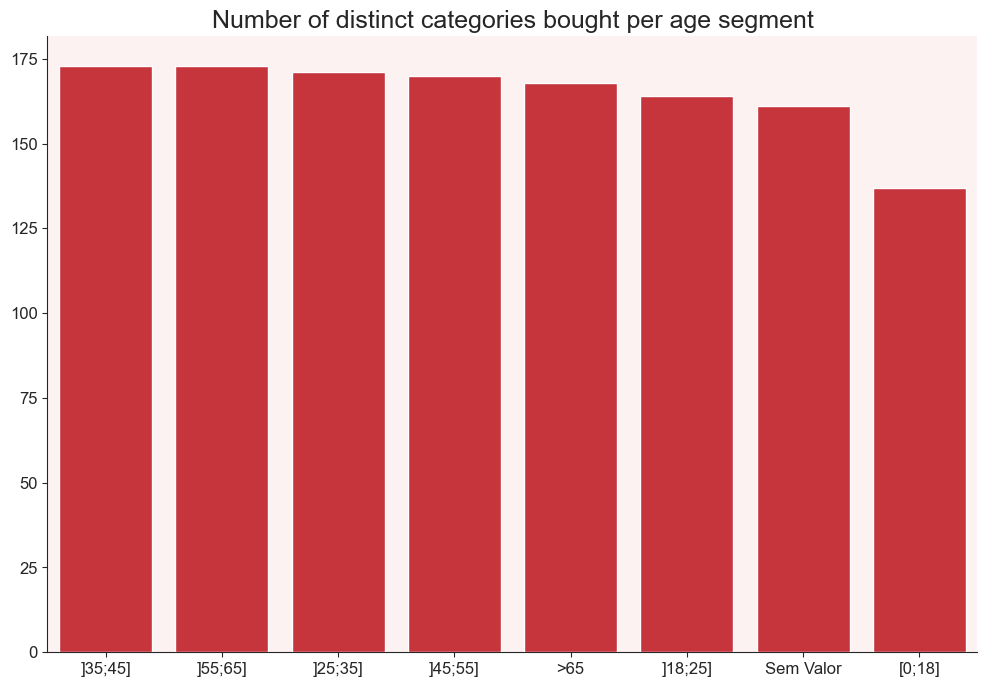

In [21]:
bar_plot(df, 'Number of distinct categories bought per age segment')

In [22]:
query = client.query("""
   SELECT 
       seg_lifestyle_dsc,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       seg_lifestyle_dsc
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestyle_dsc  num_categories_bought
0           Família                    174
1             Preço                    173
2         Qualidade                    173
3         Sem Valor                    145

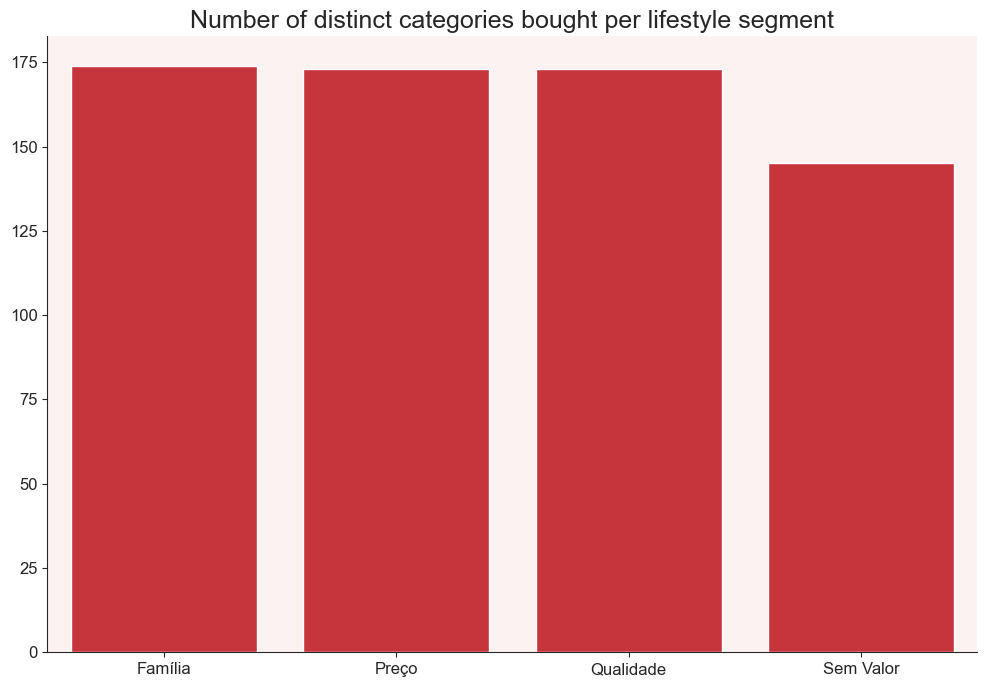

In [23]:
bar_plot(df, 'Number of distinct categories bought per lifestyle segment')

In [24]:
query = client.query("""
   SELECT 
       seg_lifestage_dsc,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       seg_lifestage_dsc
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

seg_lifestage_dsc  num_categories_bought
0      Family with Kids                    172
1         Active Adults                    172
2                Senior                    169
3  Family w/ Young Adul                    166
4     Family Supporters                    158
5              No Value                    153

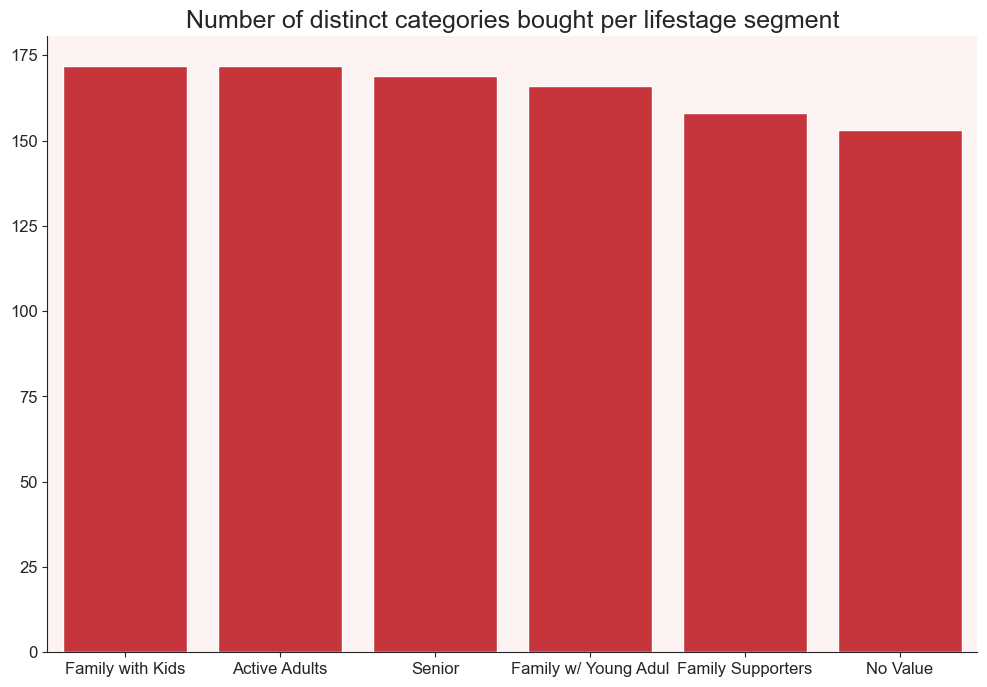

In [25]:
bar_plot(df, 'Number of distinct categories bought per lifestage segment')

In [68]:
query = client.query("""
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ORDER BY
        Quantity_sold  DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Quantity_sold
0       1601 - pão tradicional     2153005.73
1                1501 - frutas     1901874.43
2        0801 - leites e natas     1791656.00
3    0804 - iogurtes e sobrem.     1259250.00
4             0103 - conservas     1230452.00
..                         ...            ...
168           7203 - ortopedia           2.00
169          7303 - mãos e pés           1.00
170            4302 - Mascaras           1.00
171      1805 - TA Foodservice           0.29
172          7404 - perfumaria          -1.00

[173 rows x 2 columns]

In [58]:
#just checking the sales of a given product cat
query = client.query("""
    SELECT 
        CAT_DSC_EXT AS Category,
        QTY 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    AND 
        CAT_DSC_EXT = "7404 - perfumaria"
    GROUP BY
        CAT_DSC_EXT,
        QTY
    ORDER BY
        QTY  DESC
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Empty DataFrame
Columns: [Category, QTY]
Index: []

### Quantity

In [86]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Quantity_sold_without_discount,
    SecondSet.Quantity_sold_with_discount    
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_with_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Quantity_sold_without_discount  \
0       0101 - aperitivos                       544134.00   
1         0102 - temperos                       824622.00   
2        0103 - conservas                      1230452.00   
3        0104 - refei�ões                       131628.00   
4    0105 - Suplementa�ão                        54920.00   
..                    ...                             ...   
168  7803 - jogos sociais                           18.00   
169       7804 - serviços                         7832.00   
170            7805 - gás                         4701.00   
171          7908 - sacos                           21.00   
172      9806 - presentes                           26.00   

     Quantity_sold_with_discount  
0                      203328.00  
1                      179757.00  
2                      477497.00  
3                       57394.00  
4                       10706.00  
..                           ...  
168                          NaN  
169                          NaN  
170                          NaN  
171                          NaN  
172                         9.00  

[173 rows x 3 columns]

In [85]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Quantity_sold_without_discount,
    SecondSet.Quantity_sold_with_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        TRANS_DSCNT_RAT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_with_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        TRANS_DSCNT_RAT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Quantity_sold_without_discount  \
0       0101 - aperitivos                       481652.00   
1         0102 - temperos                       578553.00   
2        0103 - conservas                       932854.00   
3        0104 - refei�ões                       118831.00   
4    0105 - Suplementa�ão                        41741.00   
..                    ...                             ...   
168  7803 - jogos sociais                           15.00   
169       7804 - serviços                         7355.00   
170            7805 - gás                         3791.00   
171          7908 - sacos                           19.00   
172      9806 - presentes                           32.00   

     Quantity_sold_with_discount  
0                      265810.00  
1                      425826.00  
2                      775095.00  
3                       70191.00  
4                       23885.00  
..                           ...  
168                         3.00  
169                       477.00  
170                       910.00  
171                         2.00  
172                         3.00  

[173 rows x 3 columns]

In [91]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Quantity_sold_without_discount,
    SecondSet.Quantity_sold_with_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_with_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Quantity_sold_without_discount Desc
    LIMIT 50
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Quantity_sold_without_discount  \
0         0801 - leites e natas                      2417863.00   
1                 1501 - frutas                      2261951.62   
2        1601 - pão tradicional                      2218572.93   
3     0804 - iogurtes e sobrem.                      2131843.00   
4              0103 - conservas                      1671071.00   
5   1002 - ingredientes básicos                      1489690.00   
6               0203 - bolachas                      1350432.00   
7                1502 - legumes                      1312635.73   
8            3703 - organiza�ão                      1167578.00   
9                  0304 - águas                      1163968.00   
10         0302 - refrigerantes                      1119841.00   
11               1301 - queijos                      1014202.82   
12              0102 - temperos                      1000819.00   
13               0202 - doçaria                       980294.61   
14  0604 - prod papel e consum.                       895227.50   
15           1302 - Charcutaria                       871918.44   
16            1602 - pastelaria                       867228.43   
17  1503 - especialidades f e l                       828902.26   
18       1403 - bebidas quentes                       806176.75   
19    0603 - Limpeza e Conforto                       721800.00   
20            0101 - aperitivos                       697327.00   
21  1603 - pão industrial&tosta                       614588.05   
22  1701 - v.classif.nac/estran                       579730.00   
23      1802 - TA Livre Serviço                       534353.59   
24  1402 - alimenta�ão infantil                       525857.00   
25              0303 - cervejas                       523478.00   
26         1104 - aves e coelho                       520817.05   
27      0301 - sumos e néctares                       514802.00   
28                  3502 - gato                       504832.31   
29     1001 - gorduras líquidas                       451462.05   
30               1401 - cereais                       445094.00   
31  0802 - Gordura&Creme Culiná                       437883.00   
32        0502 - higiene íntima                       434839.00   
33      0503 - higiene corporal                       424870.00   
34            0201 - sobremesas                       406864.00   
35                  0803 - ovos                       406804.00   
36                 1102 - suíno                       399981.94   
37  1203 - peixe e marisco cong                       383631.01   
38  0601 - limp. e tratam roupa                       370254.00   
39  0702 - refei�ões congeladas                       370251.39   
40       0703 - sobremesas cong                       317656.00   
41  0701 - vegetais e frut cong                       306268.00   
42  1201 - peixe,marisco fresco                       300231.25   
43          0501 - higiene oral                       295010.00   
44  0902 - produtos para cabelo                       286029.00   
45                   3501 - cão                       261781.04   
46    0602 - limpeza da cozinha                       255229.00   
47        1801 - TA Atendimento                       254757.71   
48             3302 - papelaria                       248047.00   
49    1303 - especialidades c&q                       233954.19   

    Quantity_sold_with_discount  
0                      10236.00  
1                      11981.40  
2                       4805.23  
3                       9223.00  
4                      36878.00  
5                      14143.00  
6                      32119.00  
7                       6477.30  
8                       5322.00  
9                       4278.00  
10                      4120.00  
11                      4901.08  
12                      3560.00  
13                     29583.00  
14                      4525.00  
15                      3664.88  
16                      680

In [111]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Quantity_sold_without_discount,
    FirstSet.Quantity_sold_without_discount / (FirstSet.Quantity_sold_without_discount + SecondSet.Quantity_sold_with_discount) * 100 AS Percentage_sold_without_discount,
    SecondSet.Quantity_sold_with_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT = 0
        AND
        TRANS_DSCNT_RAT_AMT = 0
        AND
        DIRECT_DSCNT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(QTY) AS Quantity_sold_with_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT <> 0
        OR
        TRANS_DSCNT_RAT_AMT <> 0
        OR
        DIRECT_DSCNT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Quantity_sold_without_discount Desc
    LIMIT 50
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df


Category  Quantity_sold_without_discount  \
0        1601 - pão tradicional                      1574287.46   
1                 1501 - frutas                      1212515.05   
2         0801 - leites e natas                       972546.00   
3            3703 - organiza�ão                       830064.00   
4                1502 - legumes                       757742.07   
5     0804 - iogurtes e sobrem.                       754383.00   
6              0103 - conservas                       657866.00   
7                  0304 - águas                       565257.00   
8   1002 - ingredientes básicos                       539685.00   
9               0203 - bolachas                       528035.00   
10         0302 - refrigerantes                       515051.00   
11            1602 - pastelaria                       510953.33   
12  1503 - especialidades f e l                       500811.01   
13               1301 - queijos                       474852.91   
14              0102 - temperos                       472636.00   
15           1302 - Charcutaria                       446926.90   
16  0604 - prod papel e consum.                       430687.00   
17               0202 - doçaria                       424157.90   
18      1802 - TA Livre Serviço                       320472.93   
19            0101 - aperitivos                       319966.00   
20         1104 - aves e coelho                       306636.85   
21  1603 - pão industrial&tosta                       294744.00   
22                  3502 - gato                       280788.19   
23       1403 - bebidas quentes                       258361.36   
24    0603 - Limpeza e Conforto                       257948.00   
25      0301 - sumos e néctares                       251244.00   
26                 1102 - suíno                       229500.54   
27                  0803 - ovos                       219106.00   
28        0502 - higiene íntima                       209533.00   
29  0802 - Gordura&Creme Culiná                       181700.00   
30            0201 - sobremesas                       168947.00   
31        1801 - TA Atendimento                       166272.94   
32  0701 - vegetais e frut cong                       163143.00   
33               1401 - cereais                       162861.00   
34              0303 - cervejas                       154197.00   
35  1201 - peixe,marisco fresco                       152117.54   
36  0702 - refei�ões congeladas                       148330.32   
37  1402 - alimenta�ão infantil                       140862.00   
38       0703 - sobremesas cong                       138279.00   
39                   3501 - cão                       136716.04   
40             3302 - papelaria                       134172.00   
41    1303 - especialidades c&q                       126929.15   
42      0503 - higiene corporal                       123180.00   
43  1203 - peixe e marisco cong                       120052.38   
44  1701 - v.classif.nac/estran                        97703.00   
45         1105 - cozinha fácil                        96853.99   
46     1001 - gorduras líquidas                        91008.00   
47      1702 - vinhos correntes                        85422.00   
48             0104 - refei�ões                        82525.00   
49  0601 - limp. e tratam roupa                        82357.00   

    Percentage_sold_without_discount  Quantity_sold_with_discount  
0                              55.55                   1259886.53  
1                              39.37                   1867630.99  
2                              26.84                   2651416.00  
3                              54.43                    694996.54  
4                              41.50                   1068349.48  
5                              25.77                   2173146.00  
6                              26.46                   1828548.00  
7                              35.69                   101845

#### NET SALES

In [89]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Net_Sales_Without_discount,
    SecondSet.Net_Sales_With_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_Without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_With_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        DIRECT_DSCNT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Net_Sales_Without_discount  Net_Sales_With_discount
0       0101 - aperitivos                   611679.53                216014.82
1         0102 - temperos                   795147.65                233509.31
2        0103 - conservas                  1223927.27                511879.39
3        0104 - refei�ões                   141901.05                 57514.23
4    0105 - Suplementa�ão                   131929.87                 32544.79
..                    ...                         ...                      ...
168  7803 - jogos sociais                       30.00                      NaN
169       7804 - serviços                     9245.43                      NaN
170            7805 - gás                   119223.48                      NaN
171          7908 - sacos                        1.92                      NaN
172      9806 - presentes                       90.77                     9.76

[173 rows x 3 columns]

In [88]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Net_Sales_Without_discount,
    SecondSet.Net_Sales_With_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_Without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        TRANS_DSCNT_RAT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_With_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        TRANS_DSCNT_RAT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Net_Sales_Without_discount  Net_Sales_With_discount
0       0101 - aperitivos                   537372.06                290322.30
1         0102 - temperos                   607237.39                421419.57
2        0103 - conservas                   958277.46                777529.20
3        0104 - refei�ões                   126031.92                 73383.36
4    0105 - Suplementa�ão                   102693.99                 61780.67
..                    ...                         ...                      ...
168  7803 - jogos sociais                       26.00                     4.00
169       7804 - serviços                     8864.08                   381.35
170            7805 - gás                    96421.64                 22801.83
171          7908 - sacos                        1.89                     0.03
172      9806 - presentes                       92.09                     8.44

[173 rows x 3 columns]

In [87]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Net_Sales_Without_discount,
    SecondSet.Net_Sales_With_discount
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_Without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_With_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df

Category  Net_Sales_Without_discount  Net_Sales_With_discount
0       0101 - aperitivos                   771796.11                 55898.25
1         0102 - temperos                  1024959.10                  3697.85
2        0103 - conservas                  1694510.06                 41296.60
3        0104 - refei�ões                   198713.04                   702.24
4    0105 - Suplementa�ão                   163825.26                   649.39
..                    ...                         ...                      ...
168  7803 - jogos sociais                       30.00                      NaN
169       7804 - serviços                      105.37                  9140.07
170            7805 - gás                    52389.60                 66833.88
171          7908 - sacos                        1.92                      NaN
172      9806 - presentes                      100.53                      NaN

[173 rows x 3 columns]

In [115]:
query = client.query("""
    SELECT
    FirstSet.Category,
    FirstSet.Net_Sales_Without_discount,
    FirstSet.Net_Sales_Without_discount / (FirstSet.Net_Sales_Without_discount + SecondSet.Net_Sales_With_discount) * 100 AS Percentage_sold_without_discount,
    SecondSet.Net_Sales_With_discount,
    SecondSet.Net_Sales_With_discount / (FirstSet.Net_Sales_Without_discount + SecondSet.Net_Sales_With_discount) * 100 AS Percentage_sold_with_discount,
    FROM
    (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_Without_discount 
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT = 0
        AND
        TRANS_DSCNT_RAT_AMT = 0
        AND
        DIRECT_DSCNT_AMT = 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
        ) as FirstSet
    LEFT join
        (
    SELECT 
        CAT_DSC_EXT AS Category,
        SUM(NET_SLS_AMT) AS Net_Sales_With_discount  
    FROM
        tables_raw.fact_transaction
    RIGHT JOIN
        tables_raw.dim_product USING(SKU)
    WHERE
        PROD_DSCNT_ISSUED_AMT <> 0
        OR
        TRANS_DSCNT_RAT_AMT <> 0
        OR
        DIRECT_DSCNT_AMT <> 0
    AND 
        TIME_KEY BETWEEN 20220101 AND 20221231
    GROUP BY
        CAT_DSC_EXT
    ) as SecondSet
    on FirstSet.Category = SecondSet.Category
    order by FirstSet.Category
    LIMIT 50
   """)
df = query.result().to_dataframe() # Wait for the job to complete.
df


Category  Net_Sales_Without_discount  \
0             0101 - aperitivos                   362260.92   
1               0102 - temperos                   468400.08   
2              0103 - conservas                   659652.58   
3              0104 - refei�ões                    89503.22   
4          0105 - Suplementa�ão                    82307.02   
5             0201 - sobremesas                   206845.86   
6                0202 - doçaria                   601228.95   
7               0203 - bolachas                   681666.68   
8       0301 - sumos e néctares                   317192.23   
9          0302 - refrigerantes                   560301.34   
10              0303 - cervejas                   313618.09   
11                 0304 - águas                   525716.56   
12             0401 - vasilhame                     2520.62   
13                 0402 - taras                      841.16   
14          0501 - higiene oral                   179774.53   
15        0502 - higiene íntima                   522884.68   
16      0503 - higiene corporal                   209220.01   
17   0504 - hig e prote�ão bebé                   257376.10   
18  0601 - limp. e tratam roupa                   257334.14   
19    0602 - limpeza da cozinha                   153029.29   
20    0603 - Limpeza e Conforto                   387354.76   
21  0604 - prod papel e consum.                   724084.36   
22  0701 - vegetais e frut cong                   285599.46   
23  0702 - refei�ões congeladas                   383434.55   
24       0703 - sobremesas cong                   302233.65   
25        0801 - leites e natas                   930723.61   
26  0802 - Gordura&Creme Culiná                   338966.71   
27                  0803 - ovos                   428786.85   
28    0804 - iogurtes e sobrem.                   902348.49   
29  0805 - Bebida&Creme Vegetal                   134453.84   
30   0901 - produtos para homem                   117786.14   
31  0902 - produtos para cabelo                   218867.23   
32   0903 - perfum. e cosmética                   193650.52   
33     0904 - cuidados do corpo                   122427.61   
34     1001 - gorduras líquidas                   290919.36   
35  1002 - ingredientes básicos                   622132.95   
36                1101 - bovino                   803007.09   
37                 1102 - suíno                  1003521.15   
38         1103 - ovino/caprino                    92595.58   
39         1104 - aves e coelho                  1238553.66   
40         1105 - cozinha fácil                   358664.78   
41  1201 - peixe,marisco fresco                   944643.45   
42  1202 - bacalhau seco e cong                   559727.72   
43  1203 - peixe e marisco cong                   571140.03   
44               1301 - queijos                  1317541.93   
45           1302 - Charcutaria                   983685.01   
46    1303 - especialidades c&q                   322151.10   
47               1401 - cereais                   296145.09   
48  1402 - alimenta�ão infantil                   217426.80   
49       1403 - bebidas quentes                   914261.39   

    Percentage_sold_without_discount  Net_Sales_With_discount  \
0                              32.67                746655.70   
1                              33.08                947361.24   
2                              27.01               1782988.06   
3                              33.85                174943.59   
4                              37.88                134996.38   
5                              31.42                451505.67   
6                              26.74               1647097.17   
7                              29.20               1653115.51   
8                              36.81                544494.94   
9                              31.32               1228704.36   
10                             16.95               1536888.82   
11                           